https://www.advancinganalytics.co.uk/blog/2022/6/13/10-incredibly-useful-clustering-algorithms-you-need-to-know

In [52]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score, adjusted_mutual_info_score, silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

digits = load_digits()
X = digits['data']
y = digits['target']

In [53]:
from umap import UMAP

In [54]:
rslt = pd.DataFrame(np.random.rand(17, 3), columns=['RI', 'AMI', 'Silhouette'])
indeces = ['KMeans', 'GaussianMixture', 'Agglomerative', 'Birch', 'DBSCAN', 'KMeans_PCAreduced', 'GaussianMixture_PCAreduced', 'Agglomerative_PCAreduced', 'Birch_PCAreduced', 'KMeans_TSNEreduced', 'GaussianMixture_TSNEreduced', 'Agglomerative_TSNEreduced', 'Birch_TSNEreduced', 'KMeans_UMAPreduced', 'GaussianMixture_UMAPreduced', 'Agglomerative_UMAPreduced', 'Birch_UMAPreduced']
rslt['index'] = indeces
rslt.set_index('index', inplace=True)

In [55]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X)
clusters = model.predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['KMeans'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9331073937879638
AMI score: 0.7277640217287072
Silhouette score: 0.18082006221758257


In [56]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==6].value_counts()

labels  clusters
6       5           177
        7             2
        2             1
        8             1
dtype: int64

In [57]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
clusters = model.fit_predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['GaussianMixture'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9451777461321951
AMI score: 0.7829008882538224
Silhouette score: 0.17362322921677684


In [58]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['Agglomerative'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9612333349445314
AMI score: 0.866832148975032
Silhouette score: 0.17849659940596496


In [59]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['Birch'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9612333349445314
AMI score: 0.866832148975032
Silhouette score: 0.17849659940596496


In [60]:
model = DBSCAN(eps=23.5, min_samples=16)
clusters = model.fit_predict(X)
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [61]:
result_dbscan = pd.DataFrame({'labels':y, 'clusters':clusters})
result_dbscan.loc[result_kmeans.labels==6].value_counts()

labels  clusters
6        3          176
        -1            4
         1            1
dtype: int64

In [62]:
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X, clusters)
rslt.loc['DBSCAN'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9071224869957725
AMI score: 0.7333601973771944
Silhouette score: 0.1439507896248093


DBSCAN, як і інші density-based алгоритми, не пасує для цієї задачі, бо у нас є чітка кількість кластерів і вони не "вкладені" один в одного. Їх набагато легше розділити за допомогою KMeans. 

<AxesSubplot: >

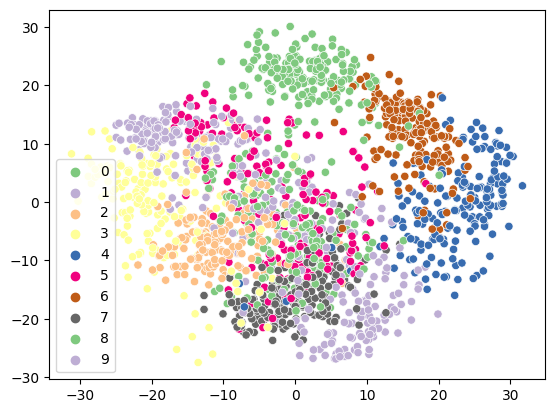

In [63]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='Accent')

In [64]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

In [65]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X_reduced)
clusters = model.predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['KMeans_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9348468680168507
AMI score: 0.7180680093369668
Silhouette score: 0.26319254944175363


In [66]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==6].value_counts()

labels  clusters
6       0           176
        4             4
        7             1
dtype: int64

In [67]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['GaussianMixture_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9141423530680309
AMI score: 0.7167597505125977
Silhouette score: 0.26115951496030415


In [68]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Agglomerative_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9435938144866537
AMI score: 0.7902928124136491
Silhouette score: 0.25188322459758233


In [69]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Birch_PCAreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9435938144866537
AMI score: 0.7902928124136491
Silhouette score: 0.25188322459758233


In [70]:
from sklearn.manifold import TSNE

In [71]:
tsne = TSNE(n_components=2,
           perplexity = 30)
X_reduced = tsne.fit_transform(X)

<AxesSubplot: >

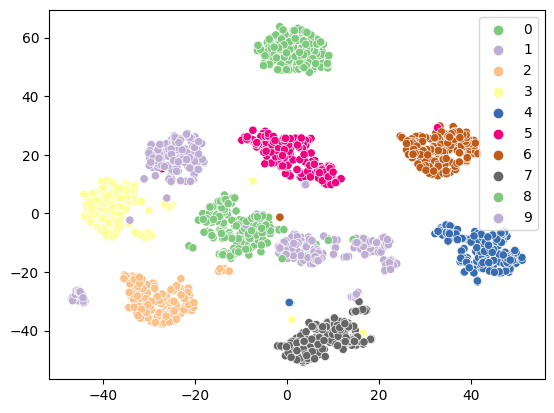

In [72]:
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='Accent')

In [73]:
tsne = TSNE(n_components=2,
           perplexity = 30)
X_reduced = tsne.fit_transform(X)

In [74]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X_reduced)
clusters = model.predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Kmeans_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9631624347929548
AMI score: 0.8756309194446692
Silhouette score: 0.6146785


In [75]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==3].value_counts()

labels  clusters
3       7           179
        6             2
        9             2
dtype: int64

In [76]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['GaussianMixture_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9631624347929548
AMI score: 0.8756309194446692
Silhouette score: 0.6146785


In [77]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Agglomerative_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9820785198790858
AMI score: 0.9201675099394233
Silhouette score: 0.64287204


In [78]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Birch_TSNEreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9820772804959516
AMI score: 0.9201660724550944
Silhouette score: 0.64236313


In [79]:
umap = UMAP(n_neighbors=5,
           n_components=2)
X_reduced = umap.fit_transform(X)

<AxesSubplot: >

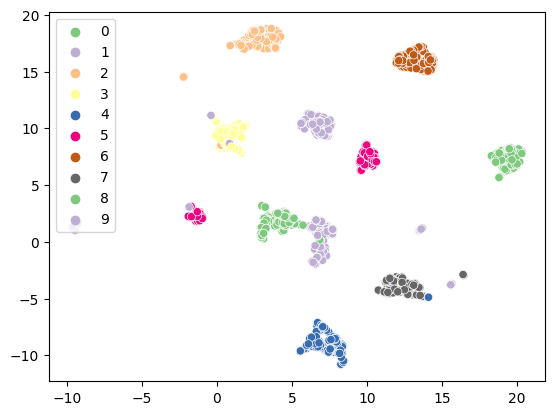

In [80]:
sns.scatterplot(X_reduced, x=X_reduced[:,0], y=X_reduced[:,1], hue=y, palette='Accent')

In [103]:
umap = UMAP(n_neighbors=5,
           n_components=3)
X_reduced = umap.fit_transform(X)

In [104]:
model = KMeans(n_clusters=10, n_init='auto')
model.fit(X_reduced)
clusters = model.predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['KMeans_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9692626785796173
AMI score: 0.9169060207346625
Silhouette score: 0.77381593


In [105]:
result_kmeans = pd.DataFrame({'labels':y, 'clusters':clusters})
result_kmeans.loc[result_kmeans.labels==3].value_counts()

labels  clusters
3       0           182
        2             1
dtype: int64

In [106]:
model = GaussianMixture(n_components=10, covariance_type='tied') #‘full’, ‘tied’, ‘diag’, ‘spherical’
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['GaussianMixture_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9692626785796173
AMI score: 0.9169060207346625
Silhouette score: 0.77381593


In [107]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Agglomerative_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9692626785796173
AMI score: 0.9169060207346625
Silhouette score: 0.77381593


In [108]:
model = Birch(n_clusters=10)
clusters = model.fit_predict(X_reduced)
RI = rand_score(y, clusters)
AMI = adjusted_mutual_info_score(y, clusters)
silhouette = silhouette_score(X_reduced, clusters)
rslt.loc['Birch_UMAPreduced'] = {'AMI': AMI, 'RI': RI, 'Silhouette': silhouette}
print('RI score: ' + str(RI))
print('AMI score: ' + str(AMI))
print('Silhouette score: ' + str(silhouette))

RI score: 0.9852674526834504
AMI score: 0.9339024993877304
Silhouette score: 0.75484216


In [110]:
rslt.sort_values('RI', ascending=False)

,RI,AMI,Silhouette
index,,,
Birch_UMAPreduced,0.985267,0.933902,0.754842
Agglomerative_TSNEreduced,0.982079,0.920168,0.642872
Birch_TSNEreduced,0.982077,0.920166,0.642363
GaussianMixture_UMAPreduced,0.969263,0.916906,0.773816
Agglomerative_UMAPreduced,0.969263,0.916906,0.773816
KMeans_UMAPreduced,0.969263,0.916906,0.773816
Kmeans_TSNEreduced,0.963162,0.875631,0.614679
GaussianMixture_TSNEreduced,0.963162,0.875631,0.614679
Agglomerative,0.961233,0.866832,0.178497


UMAP gives the highest silhouette value due to it's ability to create vast distances between different clusters and concentrate points of one cluster. Dimentionality reduction significantly improves scores/consistency of clusters (except for PCA)